# EDA (Exploratory Data Analysis) - Abalone Dataset

Ce notebook explore le dataset Abalone pour comprendre les caractéristiques des données et identifier les patterns pour la prédiction de l'âge.

# Imports

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [ ]:
# Load the dataset
df = pd.read_csv("../data/abalone.csv")

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")
df.head()

Dataset shape: (4177, 9)

Column names: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [ ]:
# Data types and missing values
print("Data Info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nBasic statistics:")
df.describe()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Missing values:
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Basic statistics:


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Distribution de la variable cible (Rings)


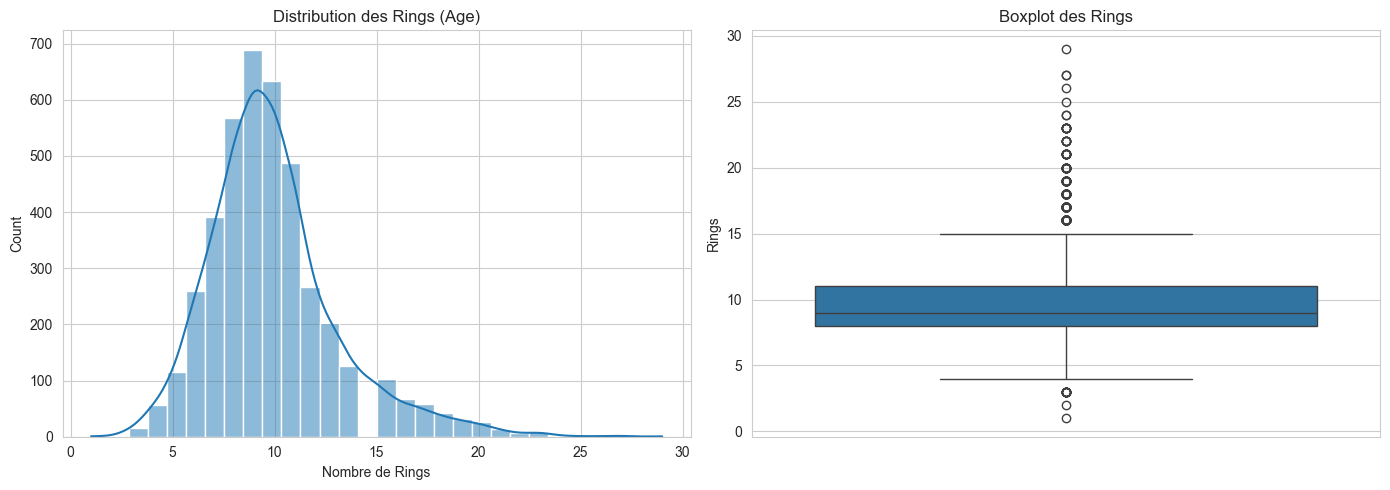

Rings - Mean: 9.93, Median: 9.0, Std: 3.22


In [ ]:
# Distribution of target variable (Rings = Age)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rings'], bins=30, kde=True)
plt.title('Distribution des Rings (Age)')
plt.xlabel('Nombre de Rings')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Rings'])
plt.title('Boxplot des Rings')

plt.tight_layout()
plt.show()

print(f"Rings - Mean: {df['Rings'].mean():.2f}, Median: {df['Rings'].median()}, Std: {df['Rings'].std():.2f}")


## Analyse des variables catégorielles


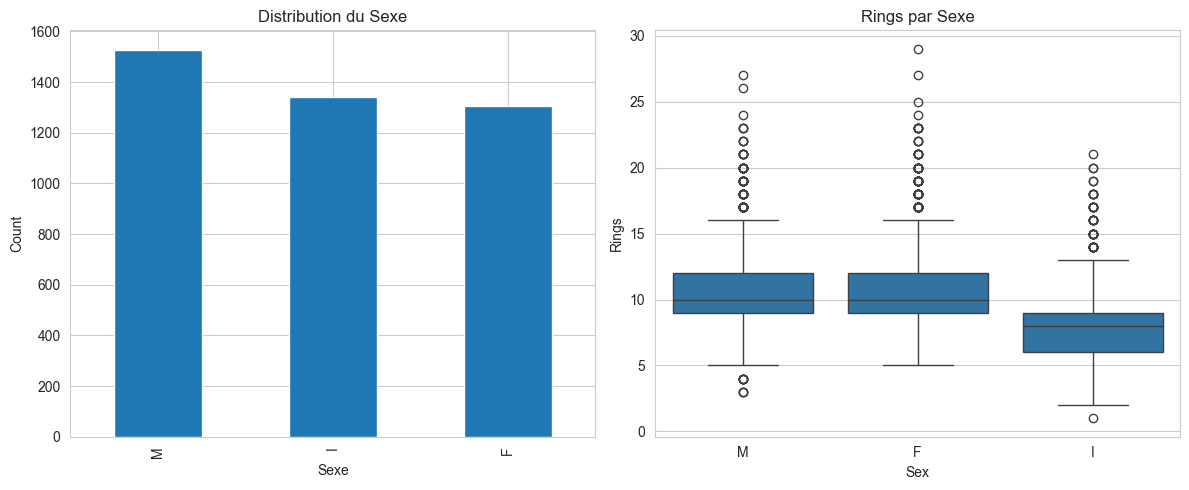

In [ ]:
# Sex distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Sex'].value_counts().plot(kind='bar')
plt.title('Distribution du Sexe')
plt.xlabel('Sexe')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Sex', y='Rings')
plt.title('Rings par Sexe')

plt.tight_layout()
plt.show()


## Corrélations entre les variables


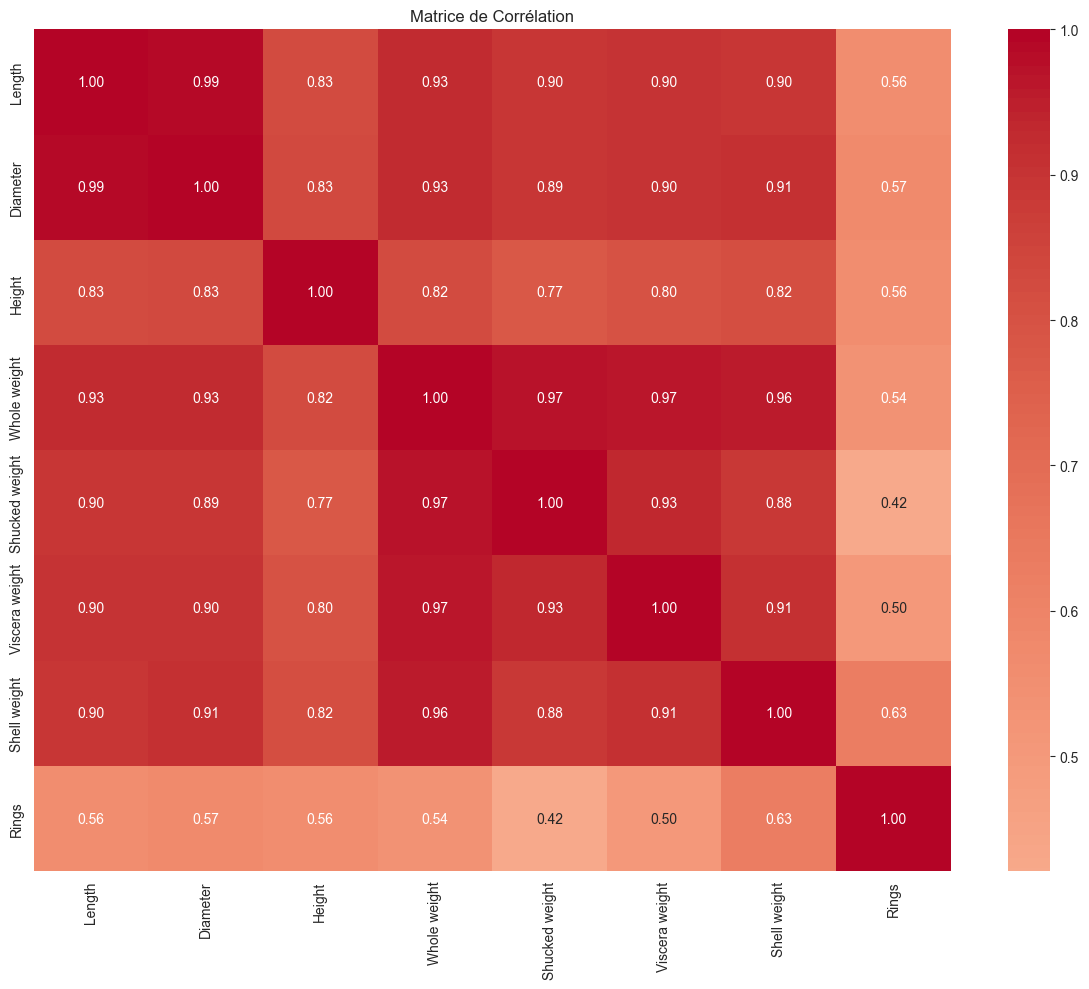


Corrélation avec Rings (target):
Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64


In [ ]:
# Correlation matrix (numerical features only)
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

# Features most correlated with Rings
print("\nCorrélation avec Rings (target):")
print(correlation_matrix['Rings'].sort_values(ascending=False))


## Conclusions

**Observations clés :**

1. **Distribution des Rings** : La variable cible suit une distribution approximativement normale, avec une légère asymétrie positive
2. **Variable Sexe** : Trois catégories (M, F, I pour infant) avec des distributions de rings similaires
3. **Corrélations** : Les variables de poids (Shell weight, Shucked weight, Whole weight) montrent les corrélations les plus fortes avec les Rings
4. **Features physiques** : Toutes les mesures physiques (longueur, diamètre, hauteur, poids) sont fortement corrélées entre elles

**Pour le modèle :**
- Utiliser toutes les features numériques car elles sont toutes corrélées avec la cible
- Encoder la variable Sex
- Possibilité de multicolinéarité entre les features de poids
